In [1]:
#!pip install pandas 
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [2]:
#Imports

import seaborn as sns
import matplotlib as plt
import pandas as pd
import missingno as msno
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [3]:
# Declarations

AV = AutoViz_Class()

In [4]:
df = pd.read_csv("C:\\Users\\diana\\Downloads\\Loans\\train.csv")

In [5]:
# DF's basic info

In [6]:
print('\nINFO')
print(df.info())

print('\nSHAPE')
print(df.shape)

print('\nDESCRIPTION')
df.describe().T.round(2)


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

SHAPE
(614, 13)

DESCRIPTION


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [7]:
# EDA

Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Loan_ID']
To fix these data quality issues in the dataset, import F

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Loan_ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gender,object,2.117264,0,,,"13 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Married,object,0.488599,0,,,"3 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Dependents,object,2.442997,0,,,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Education,object,0.000000,0,,,No issue
Self_Employed,object,5.211726,0,,,"32 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ApplicantIncome,int64,0.000000,82,150.000000,81000.000000,Column has 50 outliers greater than upper bound (10171.25) or lower than lower bound(-1498.75). Cap them or remove them.
CoapplicantIncome,float64,0.000000,NA,0.000000,41667.000000,Column has 18 outliers greater than upper bound (5743.12) or lower than lower bound(-3445.88). Cap them or remove them.
LoanAmount,float64,3.583062,NA,9.000000,700.000000,"22 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 39 outliers greater than upper bound (270.00) or lower than lower bound(-2.00). Cap them or remove them."
Loan_Amount_Term,float64,2.280130,NA,12.000000,480.000000,"14 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 88 outliers greater than upper bound (360.00) or lower than lower bound(360.00). Cap them or remove them."


Number of All Scatter Plots = 6


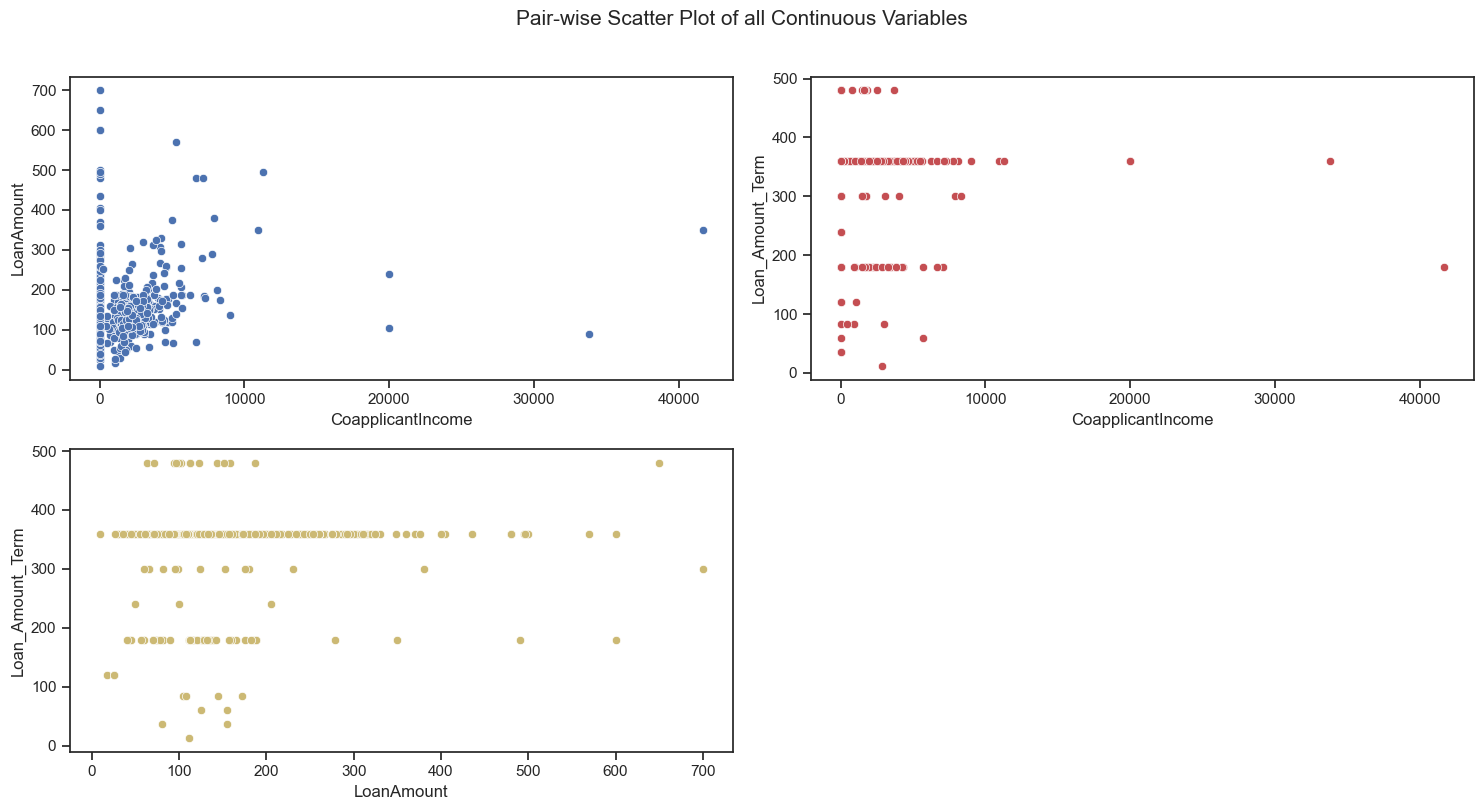

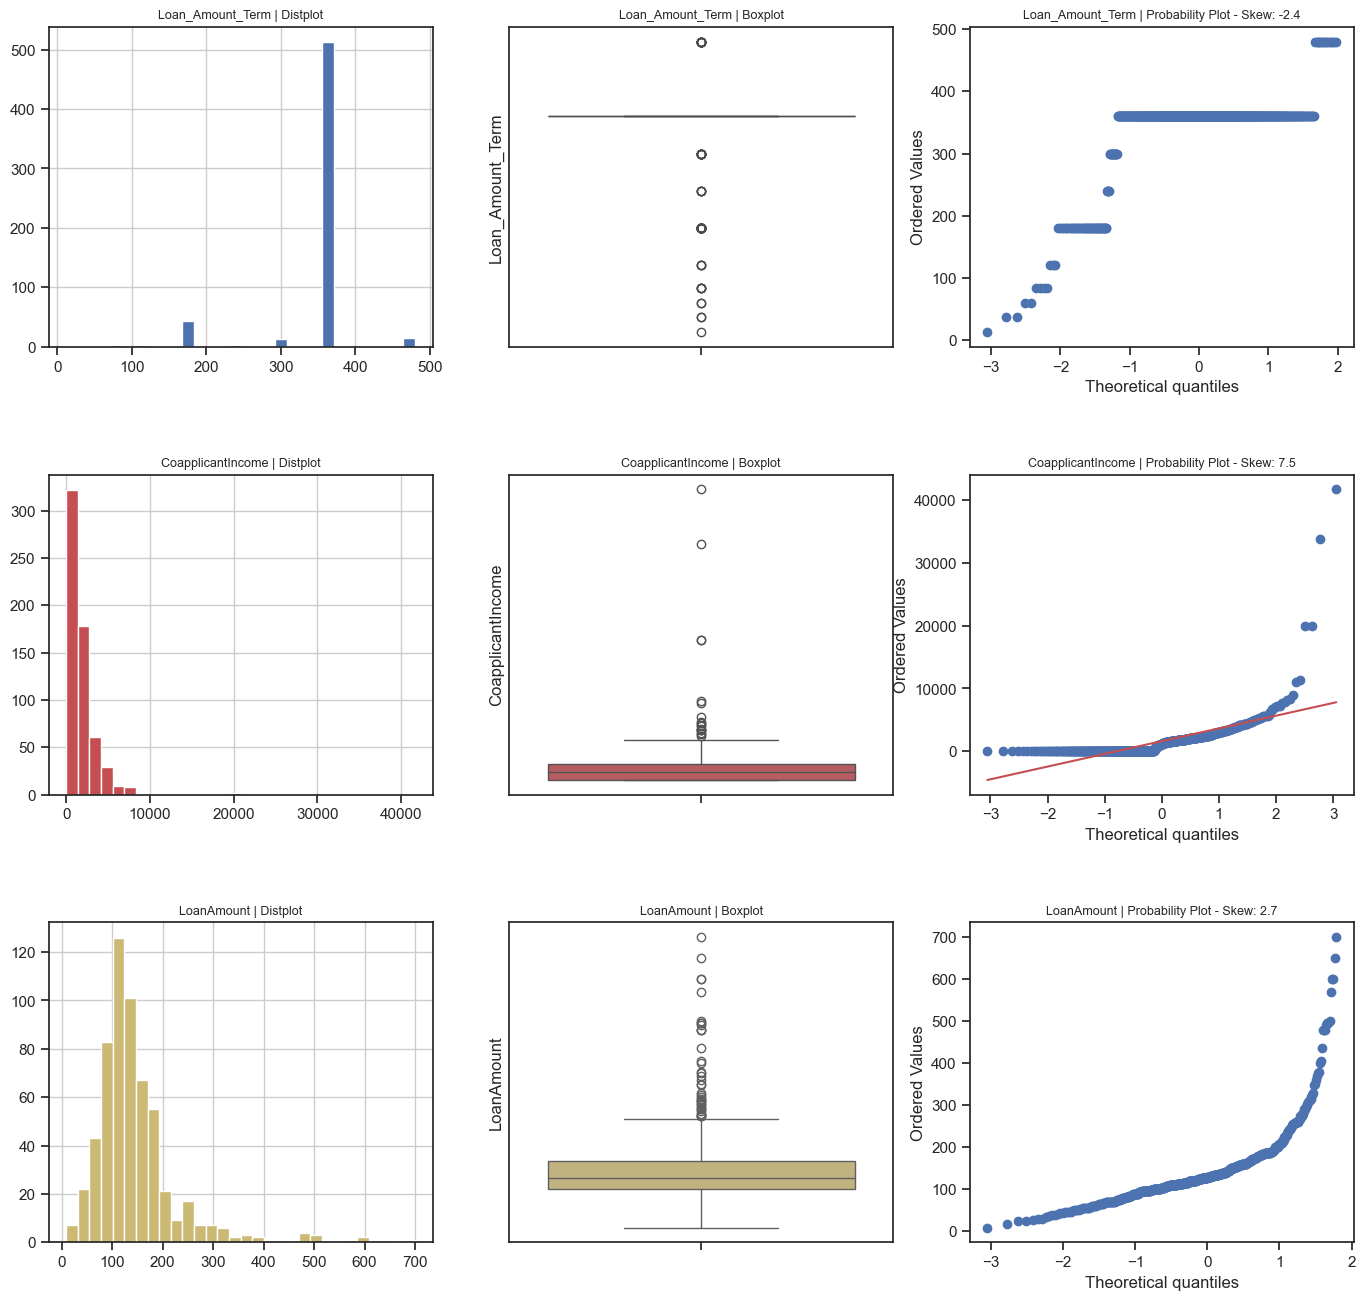

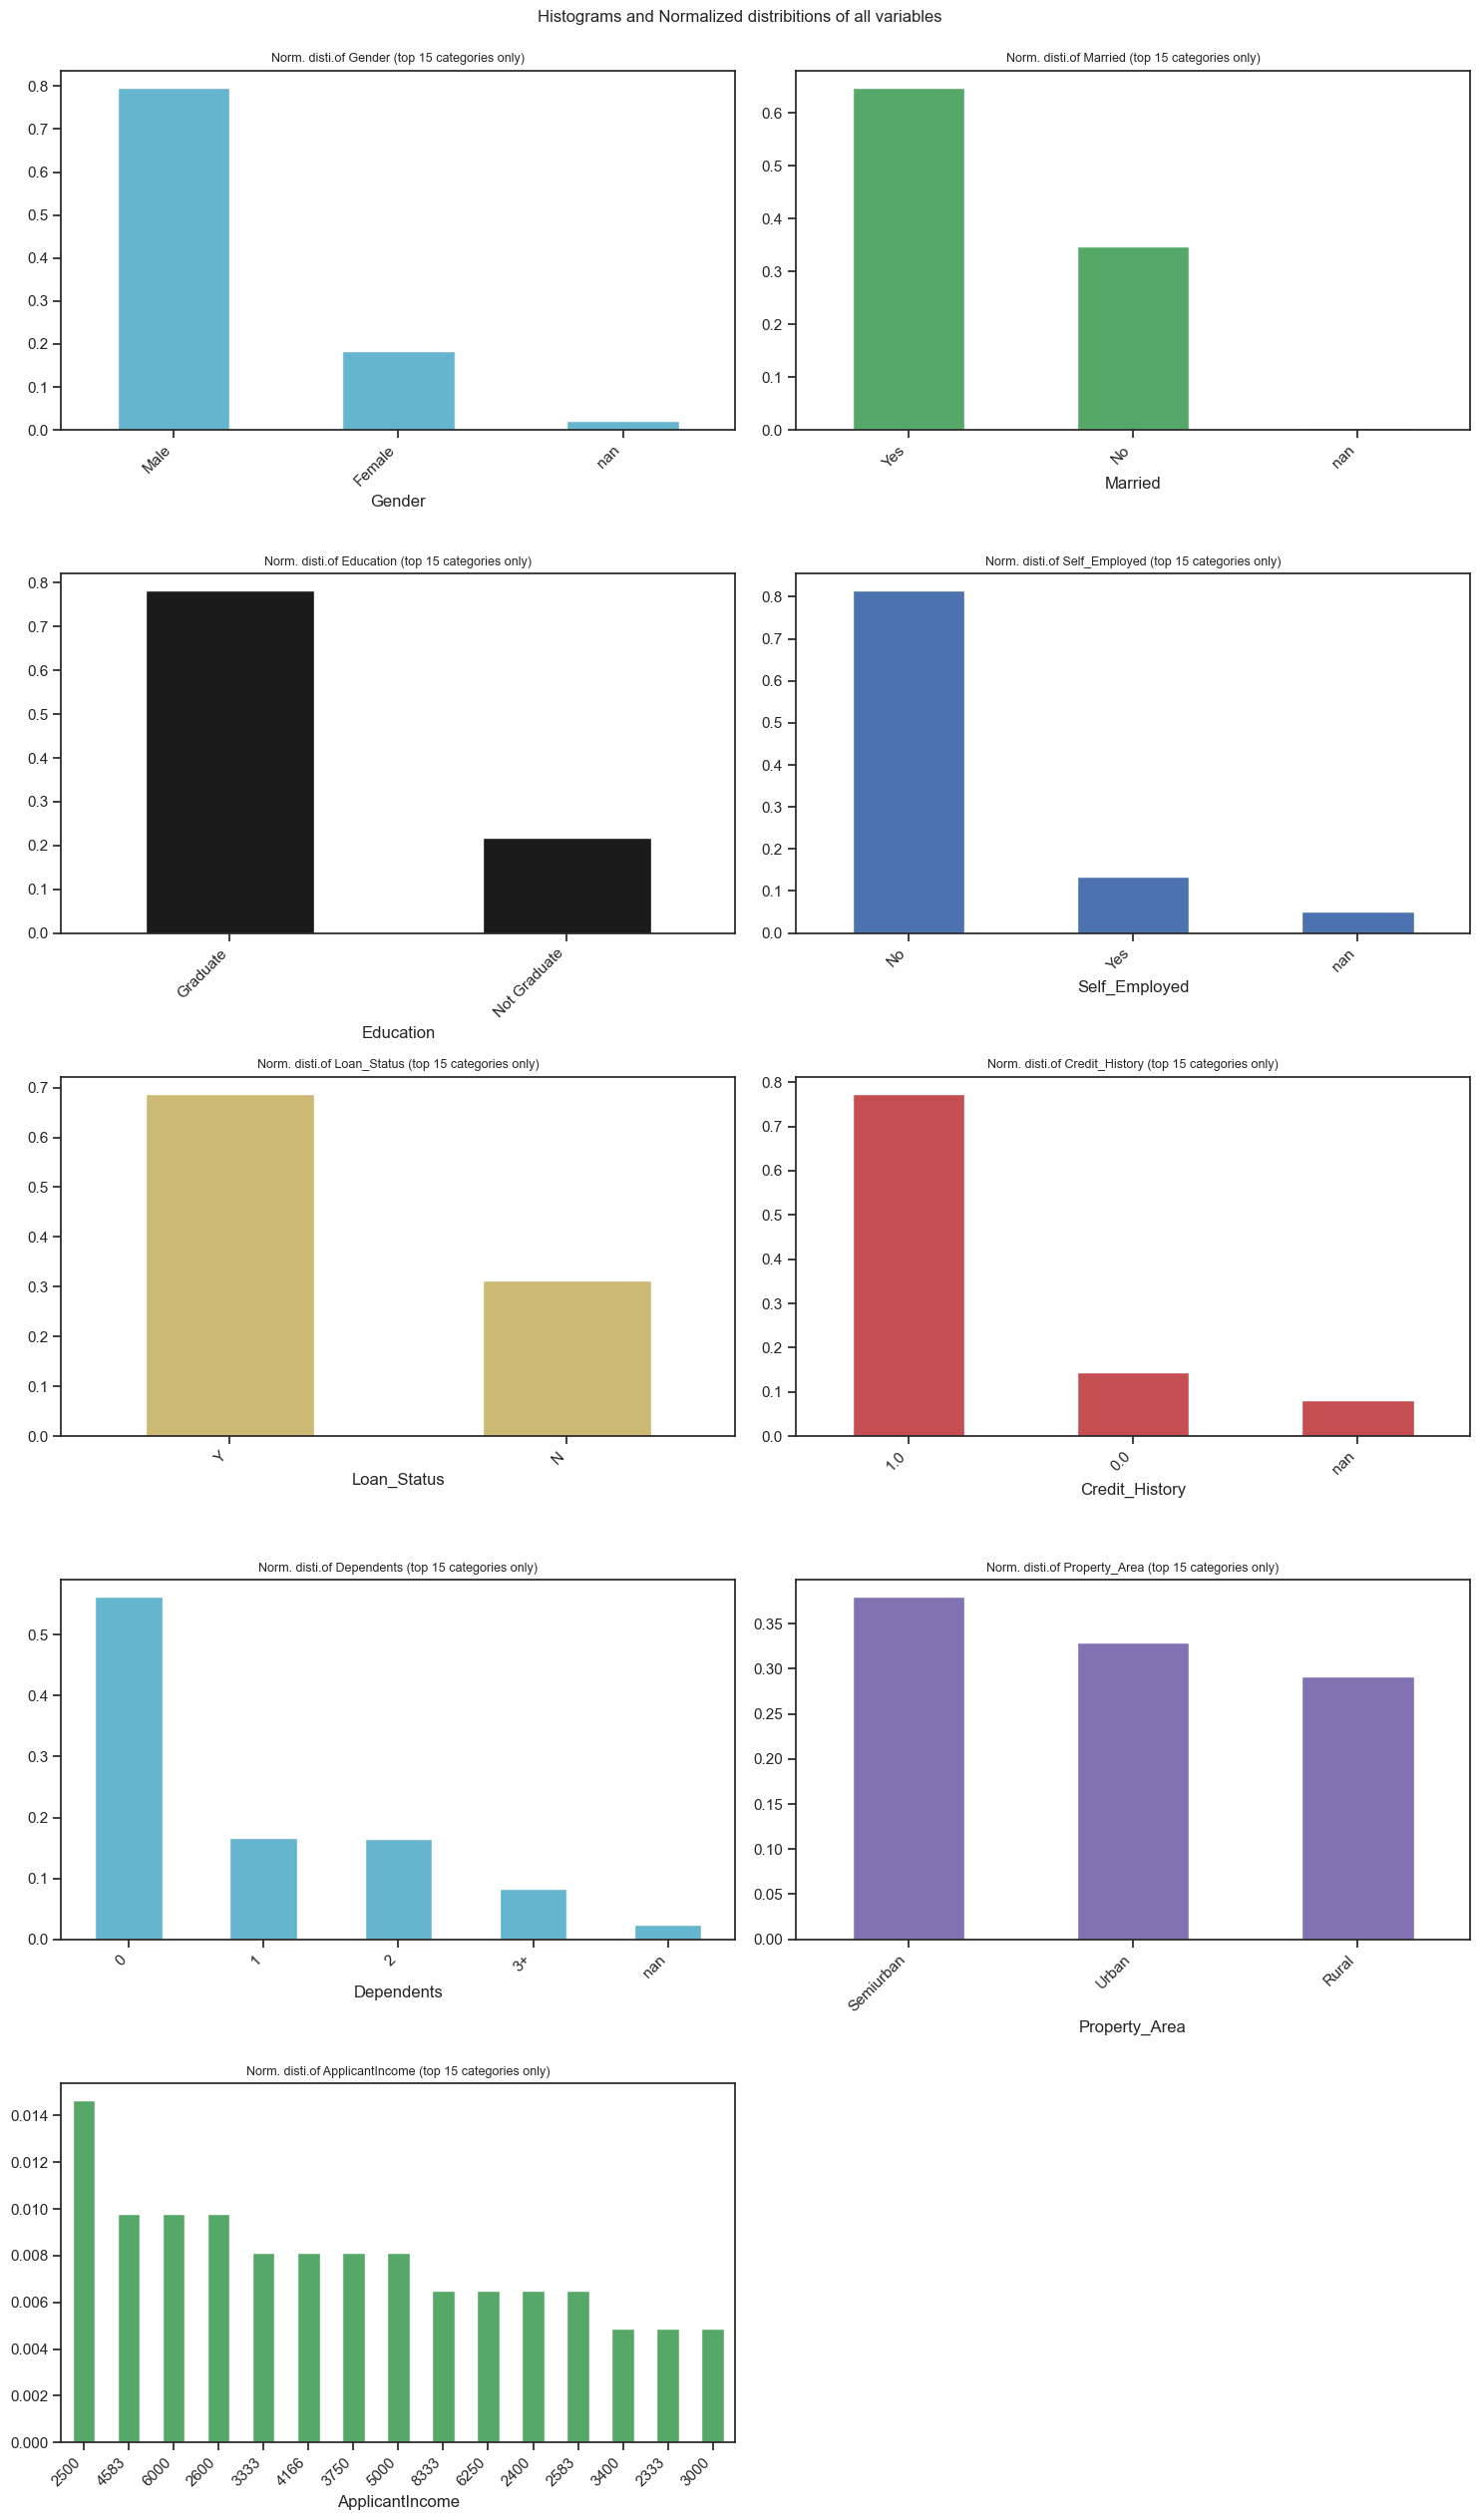

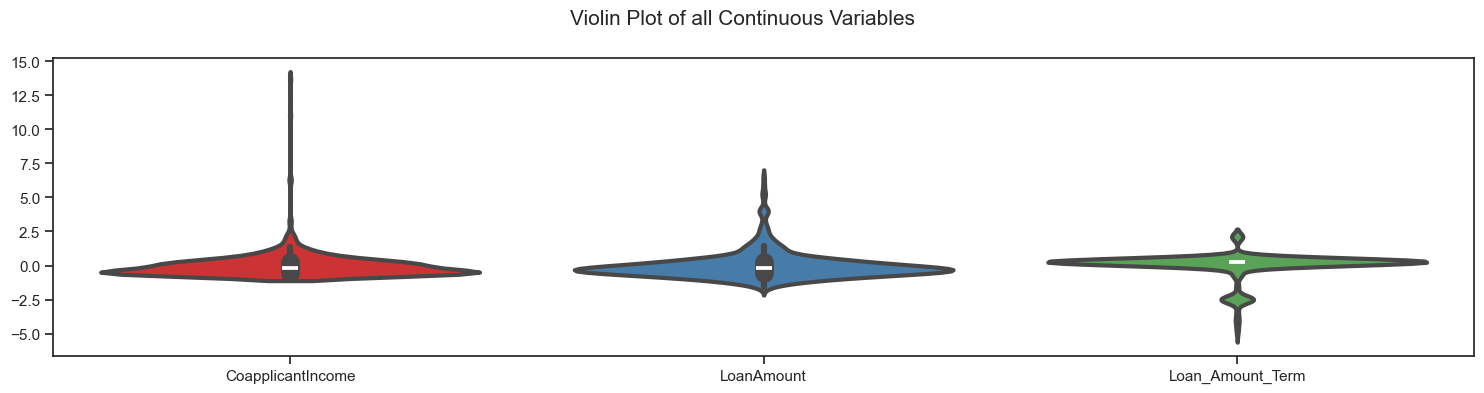

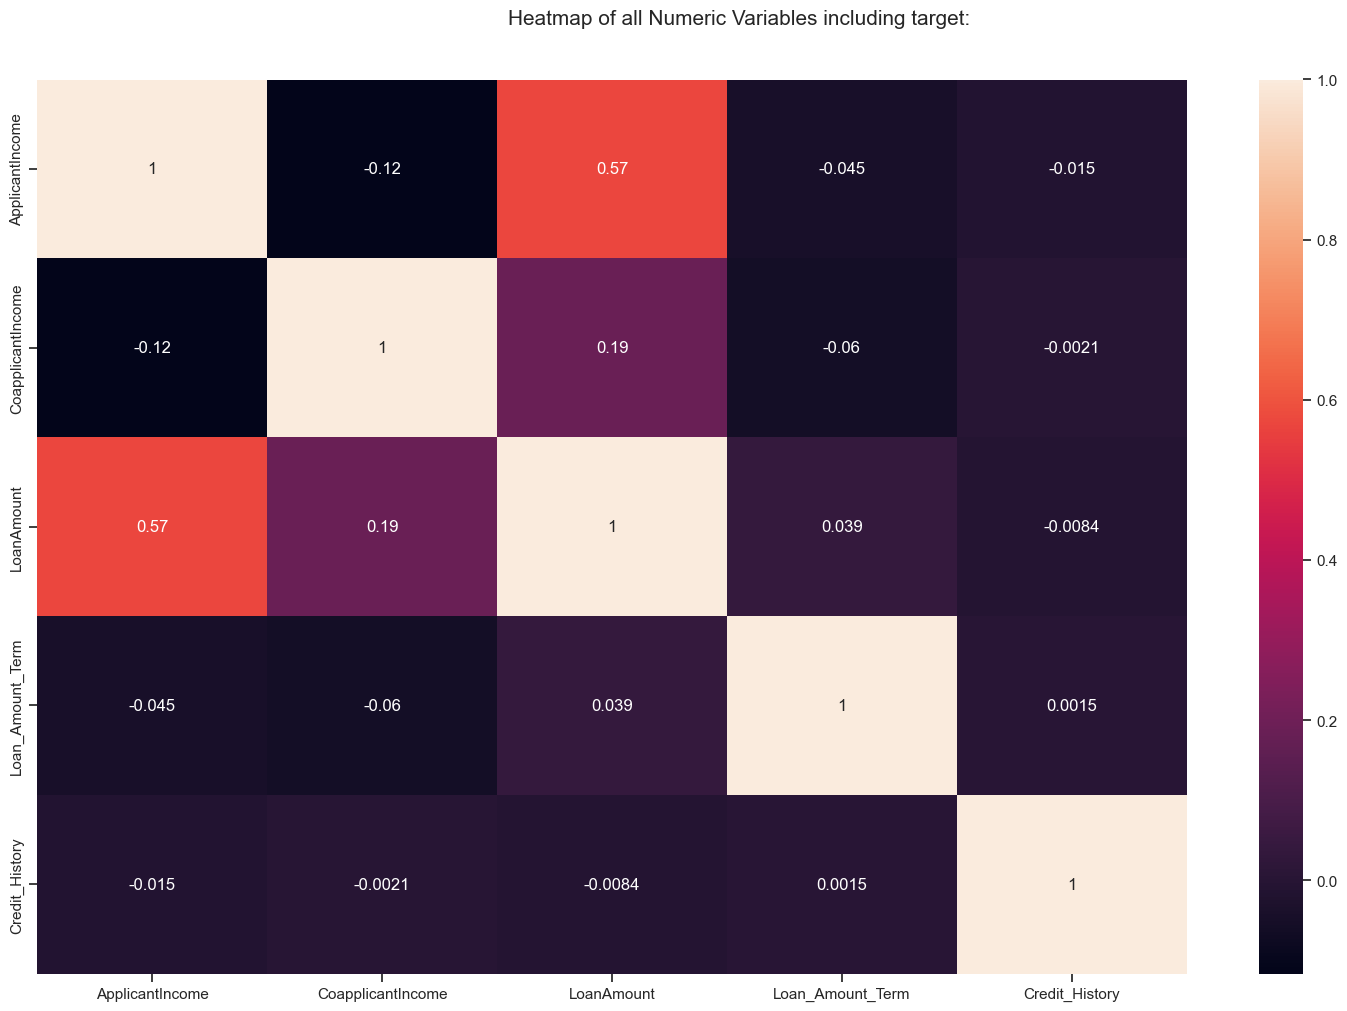

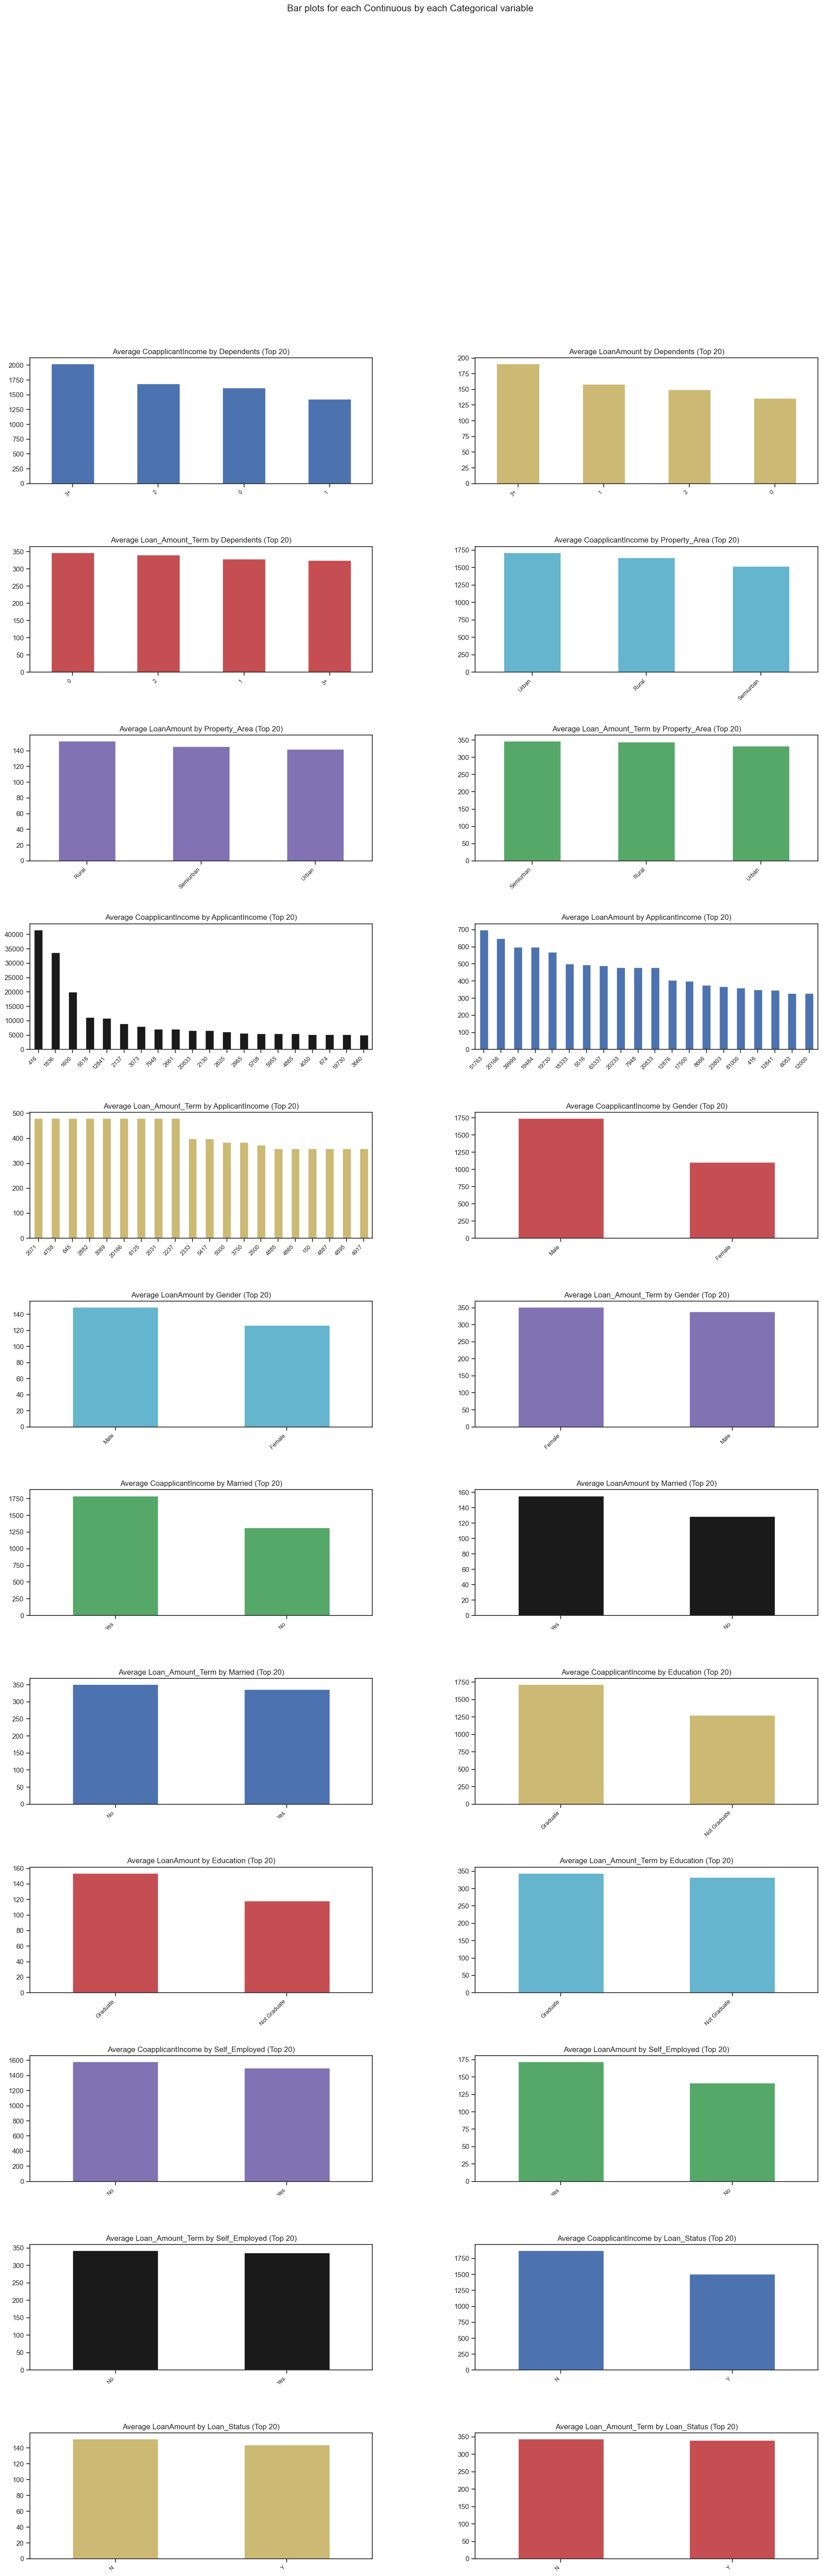

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
AV.AutoViz(df)

In [9]:
# NaNs

<Axes: >

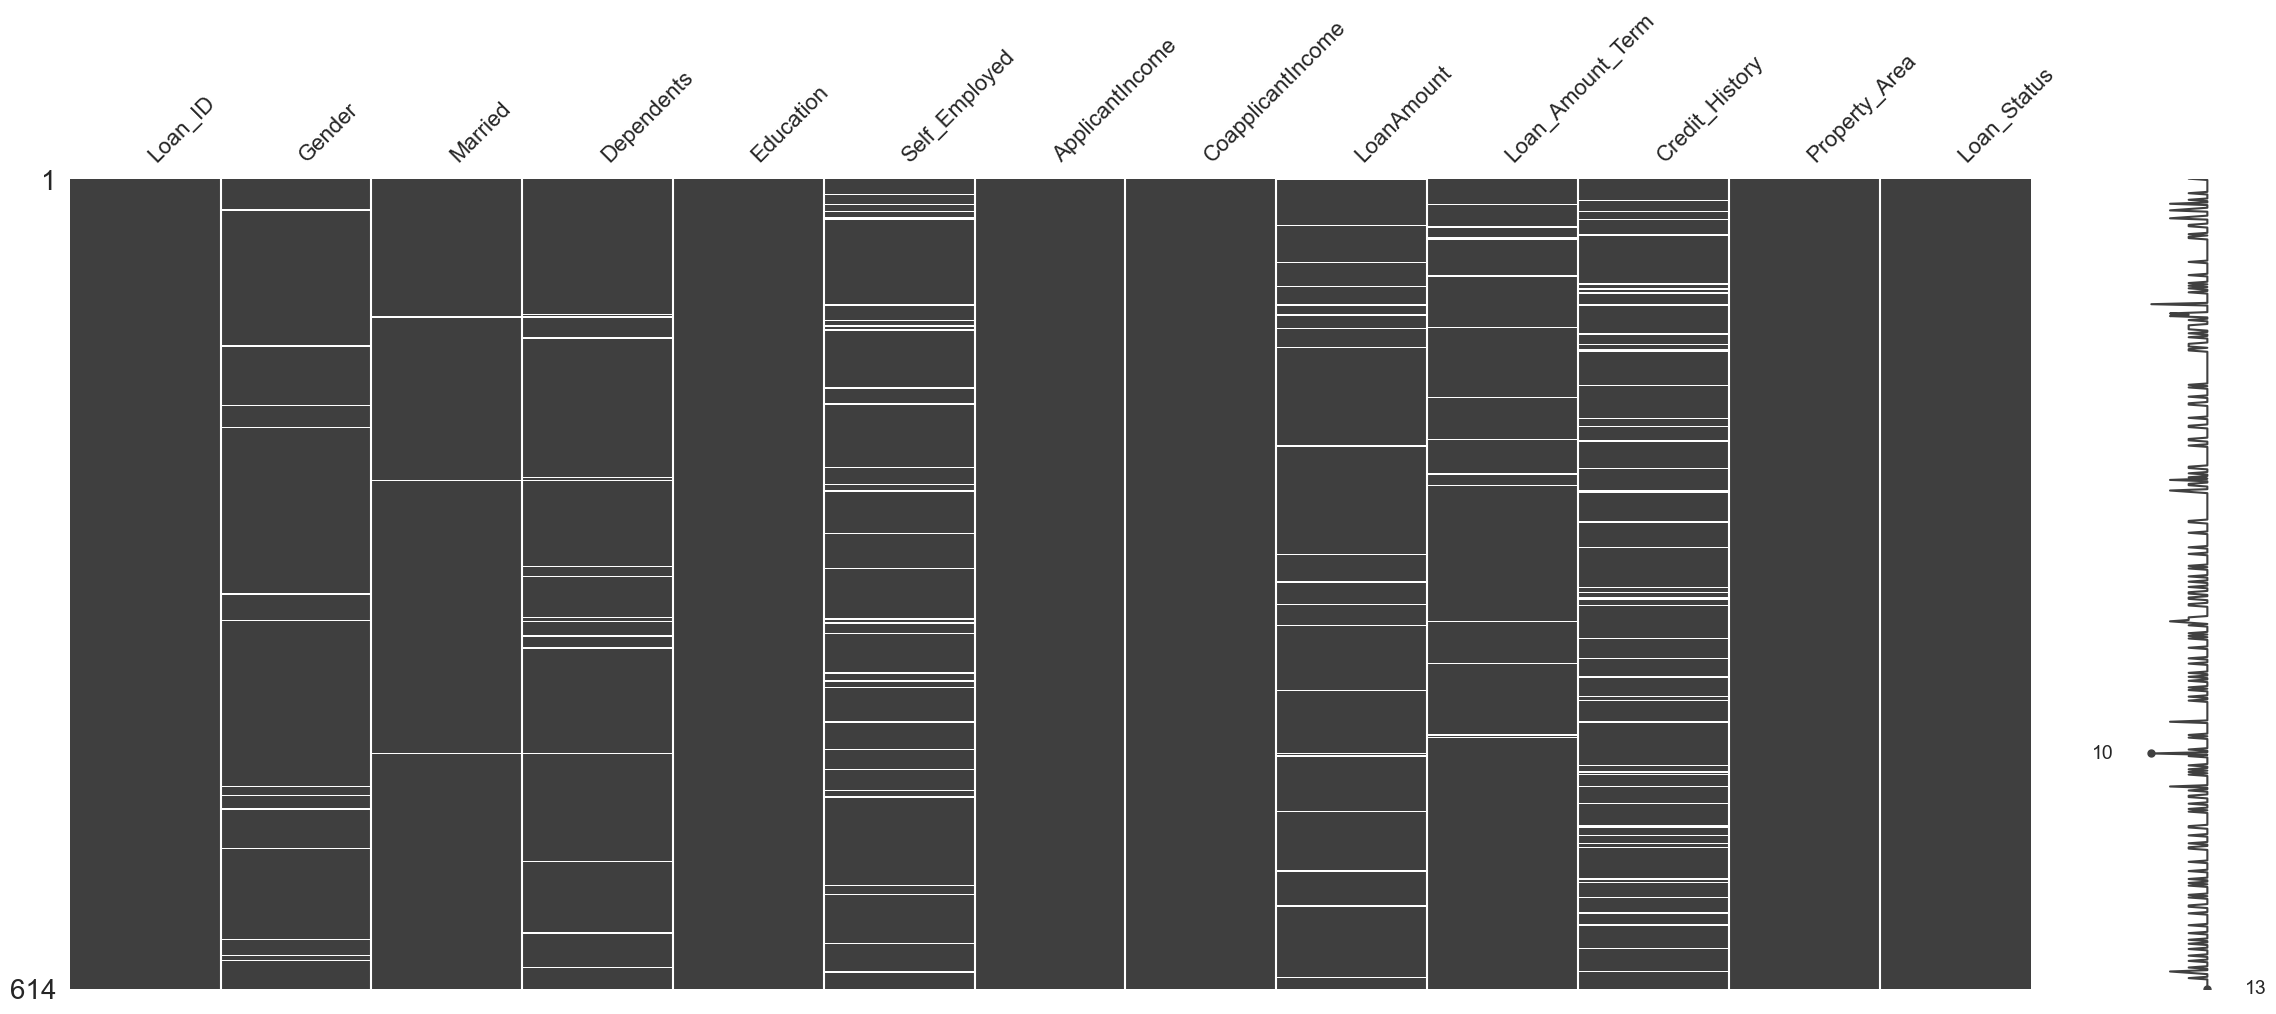

In [10]:
msno.matrix(df)

In [11]:
nan_columns = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [12]:
for col in nan_columns:
    print(f"{df[col].value_counts(dropna=False).sort_values()}\n")

Gender
NaN        13
Female    112
Male      489
Name: count, dtype: int64

Married
NaN      3
No     213
Yes    398
Name: count, dtype: int64

Dependents
NaN     15
3+      51
2      101
1      102
0      345
Name: count, dtype: int64

Self_Employed
NaN     32
Yes     82
No     500
Name: count, dtype: int64

LoanAmount
253.0     1
250.0     1
243.0     1
145.0     1
570.0     1
208.0     1
209.0     1
119.0     1
181.0     1
26.0      1
211.0     1
500.0     1
246.0     1
234.0     1
86.0      1
9.0       1
36.0      1
380.0     1
236.0     1
265.0     1
311.0     1
324.0     1
196.0     1
153.0     1
218.0     1
405.0     1
239.0     1
61.0      1
178.0     1
400.0     1
146.0     1
292.0     1
142.0     1
495.0     1
190.0     1
53.0      1
65.0      1
350.0     1
496.0     1
156.0     1
296.0     1
62.0      1
230.0     1
149.0     1
360.0     1
101.0     1
73.0      1
63.0      1
46.0      1
490.0     1
700.0     1
376.0     1
300.0     1
159.0     1
89.0      1
54.0      1
78.0  

In [13]:
nan_counts = df.isnull().sum()
nan_counts = nan_counts[nan_counts > 0] 
nan_percentage = (nan_counts / len(df)) * 100

nan_analysis = pd.DataFrame({
        'Column': nan_counts.index,
        'NaN Count': nan_counts.values,
        'NaN Percentage': nan_percentage.values})
print(nan_analysis)

        Column       NaN Count  NaN Percentage
0            Gender     13         2.117264   
1           Married      3         0.488599   
2        Dependents     15         2.442997   
3     Self_Employed     32         5.211726   
4        LoanAmount     22         3.583062   
5  Loan_Amount_Term     14         2.280130   
6    Credit_History     50         8.143322   


In [14]:
mode_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History','Loan_Amount_Term']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
mean_cols = ['LoanAmount']
for col in mean_cols:
    df[col] = df[col].fillna(df[col].mean())

In [16]:
def one_hot_encode(df, columns):

    encoder = OneHotEncoder(drop='first', sparse=False)  
    encoded_cols = encoder.fit_transform(df[columns])
    encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(columns))

    df = df.drop(columns=columns).reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)
    
    return df

In [17]:
oh_columns = ['Dependents','Property_Area']
df = one_hot_encode(df, oh_columns)

In [18]:
def binary_encode(df, columns):
    for col in df.select_dtypes(include=['object', 'category']).columns:
        unique_vals = df[col].unique()
        if len(unique_vals) == 2:
            mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
            df[col] = df[col].map(mapping)
    
    return df


In [19]:
bin_columns = ['Gender', 'Married','Self_Employed', 'Credit_History']
df = binary_encode(df, bin_columns)

In [20]:
# Outliers

In [21]:
import matplotlib.pyplot as plt
def plot_with_boundaries(df, column):
    mean_val = df[column].mean()
    std_val = df[column].std()
    lower_sigma = mean_val - 3 * std_val
    upper_sigma = mean_val + 3 * std_val

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - 1.5 * IQR
    upper_iqr = Q3 + 1.5 * IQR

    plt.figure(figsize=(10, 6))
    sns.stripplot(x=df[column])

    plt.axvline(mean_val, color='green', linestyle='--', label='Mean')
    plt.axvline(lower_sigma, color='red', linestyle='--', label='Lower 3-Sigma')
    plt.axvline(upper_sigma, color='red', linestyle='--', label='Upper 3-Sigma')
    plt.axvline(lower_iqr, color='blue', linestyle='--', label='Lower IQR')
    plt.axvline(upper_iqr, color='blue', linestyle='--', label='Upper IQR')

    plt.legend()
    plt.title(f'{column} with IQR and 3-Sigma Boundaries')
    plt.xlabel(column)
    plt.show()

In [22]:
incom_cols = ['ApplicantIncome','CoapplicantIncome']

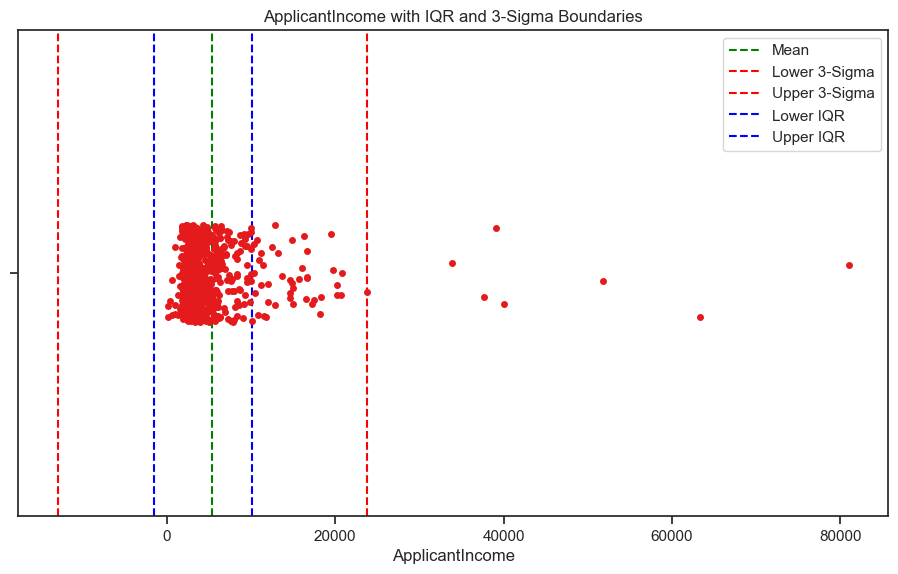

In [23]:
plot_with_boundaries(df, 'ApplicantIncome')

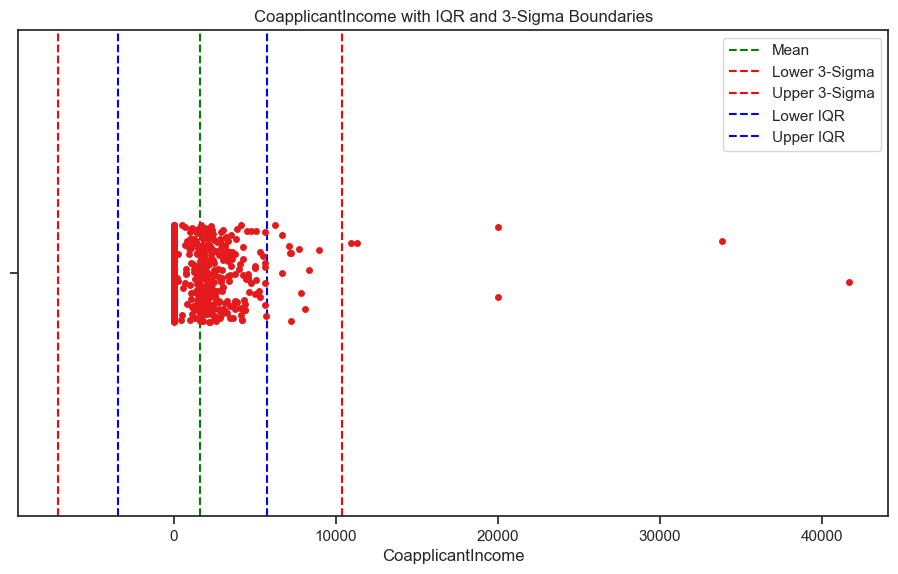

In [24]:
plot_with_boundaries(df, 'CoapplicantIncome')

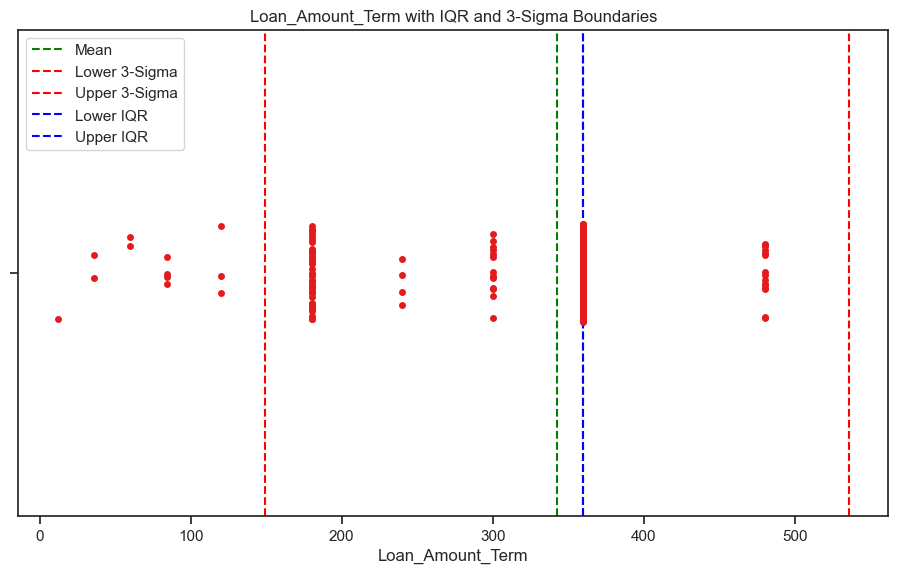

In [25]:
plot_with_boundaries(df, 'Loan_Amount_Term')

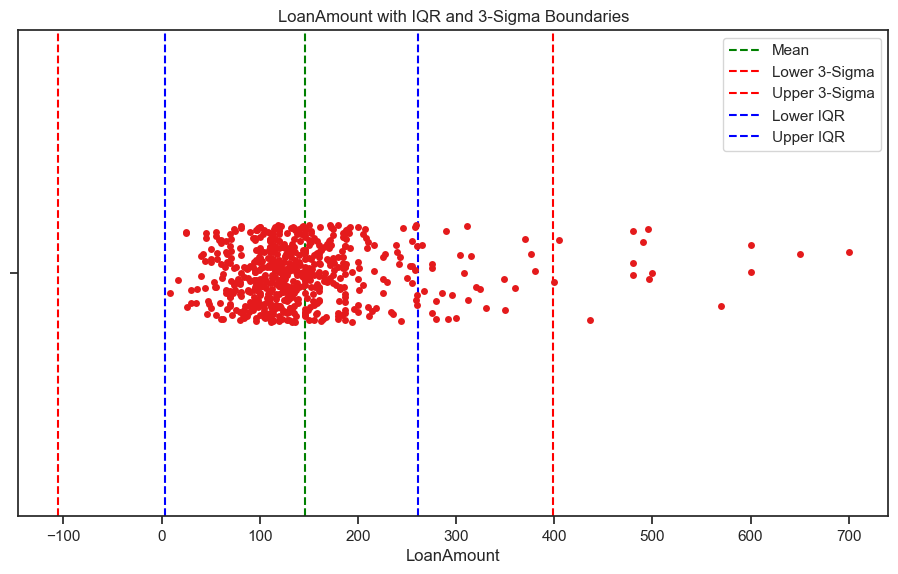

In [26]:
plot_with_boundaries(df, 'LoanAmount')

In [27]:
def cap_outliers(df, columns, sigma=3):
    df = df.copy()  # To avoid modifying the original DataFrame
    
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - sigma * std
            upper_bound = mean + sigma * std
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [28]:
def replace_outliers_with_mode(df, columns, sigma=3):
    df = df.copy() 
    
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - sigma * std
            upper_bound = mean + sigma * std
            mode = df[col].mode()[0]
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mode, df[col])

    return df

In [29]:
def replace_outliers_with_mean(df, columns, sigma=3):
    df = df.copy() 
    
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - sigma * std
            upper_bound = mean + sigma * std
            mode = df[col].mode()[0]
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mean, df[col])

    return df

In [30]:
df = cap_outliers(df, incom_cols)

In [31]:
df = cap_outliers(df, 'LoanAmount', 2.5)

In [32]:
df = replace_outliers_with_mode(df, ['Loan_Amount_Term'], 2.5)

In [33]:
df = df.drop(columns=['Loan_ID'])

In [96]:
df.to_csv('loans_clean2.csv')

In [34]:
# Try the Logical Regression model

In [35]:
def train_logical_regression(df):
    X = df.drop(columns=['Loan_Status'])
    y = df['Loan_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_pred, y_test)

    print(f"Confusion Matrix")
    print(conf_matrix)

    print(f"% hit")
    print((conf_matrix[0,0]+conf_matrix[1,1])/np.sum(conf_matrix))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [36]:
train_logical_regression(df)

Confusion Matrix
[[79 25]
 [ 1 18]]
% hit
0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86        80
           1       0.95      0.42      0.58        43

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [37]:
# trin decision tree model

In [38]:
def train_decision_tree(df):
    X = df.drop(columns=['Loan_Status'])
    y = df['Loan_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_pred, y_test)

    print(f"Confusion Matrix:")
    print(conf_matrix)

    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    print(f"% hit: {accuracy}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [39]:
train_decision_tree(df)

Confusion Matrix:
[[56 21]
 [24 22]]
% hit: 0.6341463414634146
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        80
           1       0.48      0.51      0.49        43

    accuracy                           0.63       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.64      0.63      0.64       123



In [40]:
# Random forest

In [41]:
def train_random_forest(df):
    X = df.drop(columns=['Loan_Status'])
    y = df['Loan_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42, max_depth=5, max_features=0.6, max_leaf_nodes=4)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Confusion Matrix:")
    print(conf_matrix)

    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    print(f"% hit: {accuracy}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [42]:
train_random_forest(df)

Confusion Matrix:
[[79  1]
 [25 18]]
% hit: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86        80
           1       0.95      0.42      0.58        43

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [43]:
def train_naive_bayes(df):
    X = df.drop(columns=['Loan_Status'])
    y = df['Loan_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = GaussianNB()
    # model.fit(X_train, y_train)

    param_grid = {
        'var_smoothing': np.logspace(0, -9, num=100)
    }

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Confusion Matrix:")
    print(conf_matrix)

    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    print(f"% hit: {accuracy}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [44]:
train_naive_bayes(df)

Confusion Matrix:
[[74  6]
 [25 18]]
% hit: 0.7479674796747967
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        80
           1       0.75      0.42      0.54        43

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123



In [45]:
df.to_csv('loans_clean.csv')